In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from ast import literal_eval

In [2]:
# lendo os dados
tv = pd.read_csv('../../datasets/stratified/tv.csv')

# mudando o formato das colunas
for col in ('tokens', 'aspect_tags'):
    tv[col] = tv[col].apply(literal_eval)

In [3]:
# comprimento das reviews
tv['lengths'] = tv.tokens.map(len)

[]

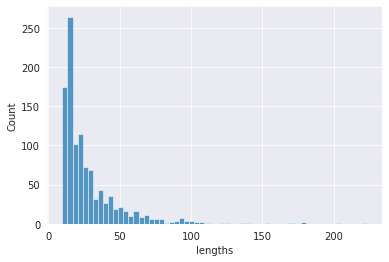

In [4]:
# distribuicão dos comprimentos das reviews
sns.histplot(tv['lengths'])
plt.plot()

In [5]:
# estatísticas do dataset
tv.describe().drop(columns=['fold'])

,review_number,total_aspects,has_aspect,lengths
count,1091.000000,1091.000000,1091.000000,1091.000000
mean,546.000000,2.132906,0.906508,28.601283
std,315.088876,1.402399,0.291254,22.898010
min,1.000000,0.000000,0.000000,10.000000
25%,273.500000,1.000000,1.000000,15.000000
50%,546.000000,2.000000,1.000000,21.000000
75%,818.500000,3.000000,1.000000,33.500000
max,1091.000000,10.000000,1.000000,223.000000


In [6]:
# quantidade de reviews maior do que 100 e maior do que 200 tokens
tv[tv.lengths > 100].shape[0], tv[tv.lengths > 200].shape[0]

(18, 2)

- São 1.091 reviews no conjunto todo (linha: `count` e coluna: `review_number`).
- Em média, as reviews possuem 2 aspectos (linha: `mean` e coluna: `total_aspects`). Sendo 10 o maior número de aspecto em uma única review (linha: `max` e coluna: `total_aspects`).
- 90.65% das reviews possuem ao menos um aspecto (linha: `mean` e coluna: `has_aspects`).
- Em média, as reviews possuem aproximadamente 29 tokens (linha: `mean` e coluna: `lengths`).
- 75% das reviews possuem até 33 tokens (linha: `75%` e coluna: `lengths`).
- A review que possui o maior comprimento, possui 223 tokens (linha: `max` e coluna: `lengths`).
- 18 reviews possui mais do que 100 tokens e 2 reviews possui mais do que 200.

In [7]:
# total de reviews por particão e total de aspectos por particão
summary = tv.groupby(['fold']).agg({'review': 'nunique', 'total_aspects': 'sum', 'has_aspect': 'sum'}).reset_index()
summary.loc[len(summary)] = ['Total', summary.review.sum(), summary.total_aspects.sum(), summary.has_aspect.sum()]
summary

,fold,review,total_aspects,has_aspect
0,1,109,234,102
1,2,110,230,99
2,3,109,236,103
3,4,109,234,98
4,5,109,235,98
5,6,109,235,99
6,7,109,226,97
7,8,109,234,96
8,9,109,229,100
9,10,109,234,97


In [8]:
print(summary.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &   fold &  review &  total\_aspects &  has\_aspect \\
\midrule
0  &      1 &     109 &            234 &         102 \\
1  &      2 &     110 &            230 &          99 \\
2  &      3 &     109 &            236 &         103 \\
3  &      4 &     109 &            234 &          98 \\
4  &      5 &     109 &            235 &          98 \\
5  &      6 &     109 &            235 &          99 \\
6  &      7 &     109 &            226 &          97 \\
7  &      8 &     109 &            234 &          96 \\
8  &      9 &     109 &            229 &         100 \\
9  &     10 &     109 &            234 &          97 \\
10 &  Total &    1091 &           2327 &         989 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_39510/1495726269.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summary.to_latex())
